In [594]:
from sympy import Symbol, Integral

In [595]:
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [596]:
x = sp.Symbol('x')
c1 = sp.Symbol('c1')
c2 = sp.Symbol('c2')
r=1.5
slope0=0
deflection1=0
l=2000
ei=666600
q=-0.0010
m0=1000
m_x=(-m0+r*x+q*x**2/2)/ei

In [597]:
slope = Integral(m_x, x).doit()+c1
slope

c1 - 2.5002500250025e-10*x**3 + 1.12511251125113e-6*x**2 - 0.0015001500150015*x

In [598]:
deflection = Integral(slope, x).doit()+c2
deflection

1.0*c1*x + c2 - 6.25062506250625e-11*x**4 + 3.75037503750375e-7*x**3 - 0.00075007500750075*x**2

In [599]:
slope_value0 = slope.subs(x,l)
value_c1 = solve(slope_value0-slope0, c1)
value_c1

[0.500050005000500]

In [600]:
slope = slope.subs(c1, value_c1[0])
slope

-2.5002500250025e-10*x**3 + 1.12511251125113e-6*x**2 - 0.0015001500150015*x + 0.5000500050005

In [601]:
deflection = deflection.subs(c1, value_c1[0])
deflection

c2 - 6.25062506250625e-11*x**4 + 3.75037503750375e-7*x**3 - 0.00075007500750075*x**2 + 0.5000500050005*x

In [602]:
deflection_value1 = deflection.subs(x, 0)
value_c2 = solve(deflection_value1-deflection1, c2)
value_c2

[0]

In [603]:
deflection = deflection.subs(c2, value_c2[0])
deflection

-6.25062506250625e-11*x**4 + 3.75037503750375e-7*x**3 - 0.00075007500750075*x**2 + 0.5000500050005*x

In [604]:
deflection.subs(x, 0)

0

In [605]:
slope.subs(x,0)

0.500050005000500

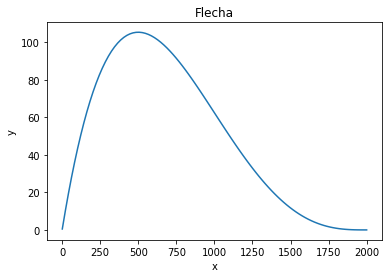

In [606]:
xs = np.linspace(1,2000,100)
ys = []
for i in xs:
    ys.append(deflection.subs(x,i))
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Flecha')
plt.show()